In [127]:
#!/usr/bin/env python3

%reload_ext autoreload
%autoreload 2

# Maths
import numpy as np
import scipy.linalg as linalg

# Scikit learn
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

# Make the plots look nicer
plot_parameters = {
    'lines.linewidth': 1.0,
    'lines.markersize': 2,
    'patch.linewidth': 1.0,
    'hatch.linewidth': 1.0,
    'axes.linewidth': 1.0,
    'xtick.top': True,
    'xtick.bottom': True,
    'xtick.direction': 'in',
    'xtick.minor.visible': True,
    'xtick.major.size': 4.0,
    'xtick.minor.size': 2.0,
    'xtick.major.pad': 5.0,
    'xtick.minor.pad': 5.0,
    'ytick.left': True,
    'ytick.right': True,
    'ytick.direction': 'in',
    'ytick.minor.visible': True,
    'ytick.major.size': 4.0,
    'ytick.minor.size': 2.0,
    'ytick.major.pad': 5.0,
    'ytick.minor.pad': 5.0   
}

for pp in plot_parameters.keys():
    mpl.rcParams[pp] = plot_parameters[pp]

# LDA

In [148]:
# Make some toy data
n = 1000
n_train = 800
X, Y = make_classification(n_samples=n, n_features=10, 
                           n_redundant=0, n_informative=1, 
                           n_clusters_per_class=1)

# Make train and test set
idxs = np.arange(0, n)
np.random.shuffle(idxs)
idxs_train = idxs[0:n_train]
idxs_test = idxs[n_train:]

X_train = X[idxs_train, :]
X_test = X[idxs_test, :]

Y_train = Y[idxs_train]
Y_test = Y[idxs_test]

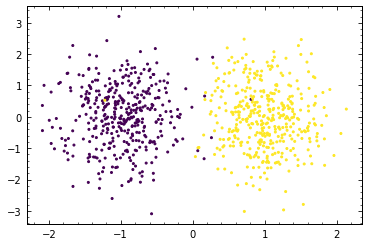

In [149]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.show()

In [161]:
def LDA(X, Y, tiny=1.0E-15):
    clusters = np.unique(Y)
    X_mean = np.mean(X, axis=0)
    
    Sw = np.zeros((X.shape[1], X.shape[1]))
    Sb = np.zeros((X.shape[1], X.shape[1]))
        
    for c in clusters:
        Xc = X[Y == c, :]
        Xc_mean = np.mean(Xc, axis=0)
        Xc -= Xc_mean
        Swc = np.matmul(Xc.T, Xc)
        Sbc = np.matmul((Xc_mean - X_mean).T, (Xc_mean - X_mean))
        
        Sw += Swc
        Sb += Sbc
        
    U, V = linalg.eigh(Sb, Sw)
        
    return V

In [162]:
W = LDA(X_train, Y_train)
print(W.shape)
XX_train = np.matmul(X_train-np.mean(X_train, axis=0), W)

(10, 10)


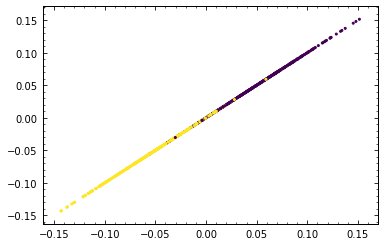

In [163]:
plt.scatter(XX_train[:, 0], XX_train[:, 0], c=Y_train)
plt.show()

In [164]:
sklda = LinearDiscriminantAnalysis()
sklda.fit(X_train, Y_train)
skXX_train = sklda.transform(X_train)

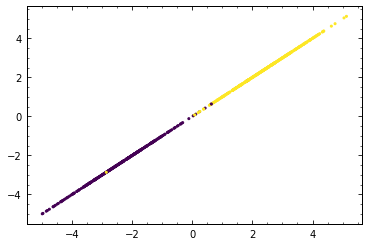

In [165]:
plt.scatter(skXX_train[:, 0], skXX_train[:, 0], c=Y_train)
plt.show()